In [13]:
import numpy as np
import scipy as sp
from scipy import linalg 

x = [-3,-2,-1,0,1,2,3] # данные по x
y = [-10, -5, -2, 0, 2, 5, 10] #данные по y

In [14]:
def mas(x,n): #находим сумму элементов массива, взятых в степени n
    s = 0
    for i in range (6):
        s = s + x[i]**n
    return s
        
def mas2(x,y,n):
    s = 0
    for i in range (6):
        s = s + y[i] * (x[i] **n)
    return s

In [15]:
def mnk (x,y): #функция нахождения коэффициентов квадратного полинома с помощтю МНК
    A = np.zeros((3,3)) #матрица 3 на 3 из нулей
    a_0 = 7
    a_1 = mas (x,1)
    a_2 = mas (x,2)
    a_3 = mas (x,3)
    a_4 = mas (x,4)
    
    b_0 = mas2(x,y,2)
    b_1 = mas2 (x,y,1)
    b_2 = mas(y,1)
    b = [b_0, b_1, b_2] #вектор свободных членов
    
    A[0][0] = a_4
    A[0][1] = a_3
    A[0][2] = a_2
    A[1][0] = a_3
    A[1][1] = a_2
    A[1][2] = a_1
    A[2][0] = a_2
    A[2][1] = a_1
    A[2][2] = a_0
    
    sol = linalg.solve(A,b) #находим решение линейной системы
    
    return sol

In [16]:
sol = mnk (x,y)
print ("Искомые коэффициенты(a, b, c):")
print round(sol[0],2)
print round(sol[1],2)
print round(sol[2],2)

Искомые коэффициенты(a, b, c):
-0.23
2.56
0.29


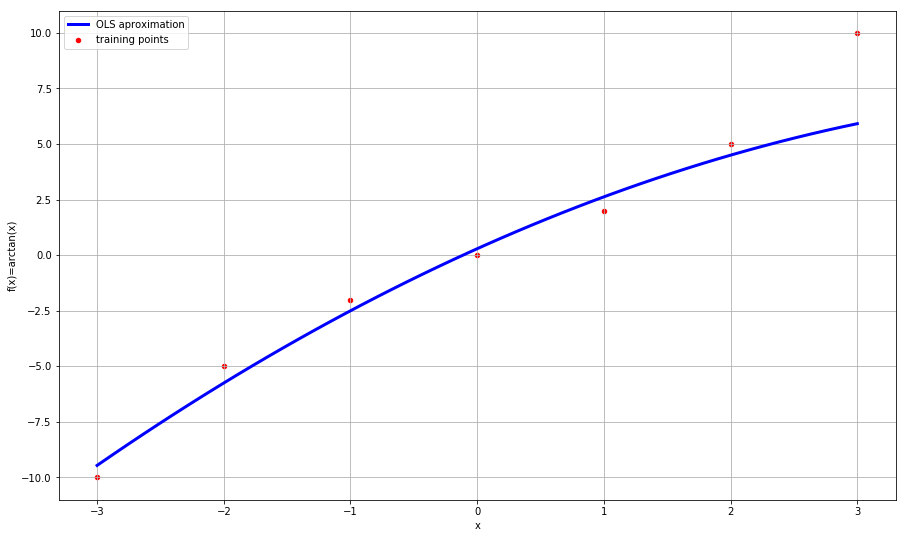

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

def g(x):
    return (sol[0]*x**2 + sol[1]*x + sol[2])

fig, ax = plt.subplots(figsize=[15, 9])

plt.scatter(x, y, color = 'red',s=20, marker='o', label="training points")

x = np.linspace(-3, 3, 50)
y = g(x)

plt.plot(x,y, 'blue', lw=3, label = 'OLS aproximation')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('f(x)=arctan(x)')
ax.grid(True)